In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib notebook

# np.random.seed(0)
N = 3
L = 10.0
# dt = 0.01
dt=1
T = 1000

pos=np.random.rand(N,2)*L #generates random variables between 0 to L
vel=np.random.uniform(-1,1,size=(N,2)) #generates random variables between -1 to +1
mass=np.ones_like(pos)

In [ ]:
def walls_reflect(pos, vel, L, left, right, top , bottom):
    a=time.time()
    # Left wall (x < 0)
    # left_hits = pos[:, 0] < 0
    # vel[left_hits, 0] *= -1  # flip x velocity for particles hitting left wall
    # pos[left_hits, 0] = 0.0  # push back inside for particles hitting left wall
    # left_hits = pos[:, 0] < 0
    vel[left, 0] *= -1  # flip x velocity for particles hitting left wall
    pos[left, 0] = 0.0
    # Right wall (x > L)
    # right_hits = pos[:, 0] > L
    vel[right, 0] *= -1 # flip x velocity for particles hitting right wall
    pos[right, 0] = L  # push back inside for particles hitting right wall

    # Bottom wall (y < 0)
    # bottom_hits = pos[:, 1] < 0
    vel[bottom, 1] *= -1 # flip y velocity for particles hitting bottom wall
    pos[bottom, 1] = 0.0  # push back inside for particles hitting bottom wall

    # Top wall (y > L)
    # top_hits = pos[:, 1] > L
    vel[top, 1] *= -1 # flip y velocity for particles hitting top wall
    pos[top, 1] = L  # push back inside for particles hitting top wall
    b=time.time()
    print(b-a)
    return pos,vel

In [ ]:
def walls_reflect_other(pos, vel, L):
    a=time.time()
    x= (pos[:, 0] < 0) | (pos[:, 0] > L)
    vel[x, 0] *= -1
    pos[:, 0] = np.where(pos[:, 0] < 0, 0.0, np.where(pos[:, 0] > L, L, pos[:, 0]))


    y = (pos[:, 1] < 0) | (pos[:, 1] > L)
    vel[y, 1] *= -1
    pos[:, 1] = np.where(pos[:, 1] < 0, 0.0, np.where(pos[:, 1] > L, L, pos[:, 1]))
    b=time.time()
    print(b-a)
    return pos, vel

In [ ]:
k = 1.0
r0 = 0.8
rc = 2.0 # cutoff distance
l=int(L)
import math
def pair_forces(pos):
    F = np.zeros_like(pos)
    # print(pos)
    for i in range(N):
        for j in range(i,N):
            if(i != j):
                r=np.sqrt((pos[i][0]-pos[j][0])**2 + (pos[i][1]-pos[j][1])**2)
                if (r<rc):
                    f=-k*(r-r0)
                    if (pos[i][1]!=pos[j][1]):
                        theta= math.atan(pos[i][0]-pos[j][0])/(pos[i][1]-pos[j][1])
                        # print(theta)
                        F[i][1]+=f*np.sin(theta)
                        F[i][0]+=f*np.cos(theta)
                        F[j][1]+=-f*np.sin(theta)
                        F[j][0]+=-f*np.cos(theta)

                        # print((pos[i][0]-pos[j][0]) == 0, (pos[i][1]-pos[j][1]) == 0)
                        # print((pos[i][0]-pos[j][0]), (pos[i][1]-pos[j][1]))

                    else:
                        # if (pos[i][0]-pos[j][0]) > 0 :
                        #   F[i][1]+=
                        theta = math.pi/2
                        F[i][1]+=f*np.sin(theta)
                        F[i][0]+=f*np.cos(theta)
                        F[j][1]+=-f*np.sin(theta)
                        F[j][0]+=-f*np.cos(theta)

    # d = pos [ None ,: ,:] - pos [: , None ,:]
    # pairwise displacements (N,N ,2)
    # r = np . linalg . norm (d , axis =2)
    # pairwise distances (N,N)
    # print(r)
    # mask = ( r < rc ) & ( r > 1e-12)
    # ignore self and far pairs
    # print(mask)
    # print(r)
    # u = d / ( r [: ,: , None ] + 1e-12)
    # unit vectors
    # fmag = -k * ( r - r0 ) * mask
    # F2 = np .sum ( fmag [: ,: , None ] * u , axis =1)


    return F

print(pair_forces(pos))

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [ ]:
def step_once(pos, vel, mass, dt, L):
    # 1. Compute forces
    F = pair_forces(pos)

    # 2. Update velocities using F = m a
    acc = F / mass
    vel = vel + acc * dt
    # print(pos[:, 0] < 0)
    # 3. Update positions using new velocities
    pos = pos + (vel * dt)
    # print(pos[:, 0] < 0)
    # # # 4. Bounce from walls
    # left_hits = pos[:, 0] < 0
    # # print(left_hits)
    # right_hits = pos[:, 0] > L
    # bottom_hits = pos[:, 1] < 0
    # top_hits = pos[:, 1] > L
    # walls_reflect(pos, vel, L, left_hits, right_hits, top_hits, bottom_hits)
    walls_reflect_other(pos,vel,L)

    return pos, vel


In [ ]:
def step_smooth(pos, vel, mass, dt, L, F_prev=None):
    # 1. Force at old positions
    if F_prev is None:
        F_prev = pair_forces(pos)
    a_prev = F_prev / mass[:, None]

    # 2. Half velocity update
    vel_half = vel + 0.5 * a_prev * dt

    # 3. Move positions
    pos_new = pos + vel_half * dt
    walls_reflect_other(pos_new, vel_half, L)

    # 4. New forces
    F_new = pair_forces(pos_new)
    a_new = F_new / mass[:, None]

    # 5. Finish velocity update
    vel_new = vel_half + 0.5 * a_new * dt

    return pos_new, vel_new, F_new


5.459785461425781e-05
4.935264587402344e-05
0.00010228157043457031
8.130073547363281e-05
7.319450378417969e-05
7.724761962890625e-05
8.726119995117188e-05
7.224082946777344e-05
7.128715515136719e-05
9.799003601074219e-05
6.556510925292969e-05
6.151199340820312e-05
5.8650970458984375e-05
6.365776062011719e-05
6.961822509765625e-05
6.556510925292969e-05
6.628036499023438e-05
6.890296936035156e-05
6.461143493652344e-05
6.866455078125e-05
6.866455078125e-05
5.269050598144531e-05
4.673004150390625e-05
4.7206878662109375e-05
4.57763671875e-05
6.532669067382812e-05
5.269050598144531e-05
4.57763671875e-05
5.030632019042969e-05
4.7206878662109375e-05
9.5367431640625e-05
5.054473876953125e-05
5.125999450683594e-05
4.6253204345703125e-05
4.744529724121094e-05
4.6253204345703125e-05
5.602836608886719e-05
4.9591064453125e-05
7.200241088867188e-05
5.054473876953125e-05
4.696846008300781e-05
6.29425048828125e-05
5.459785461425781e-05
4.553794860839844e-05
5.1975250244140625e-05
6.842613220214844e-05


4.363059997558594e-05


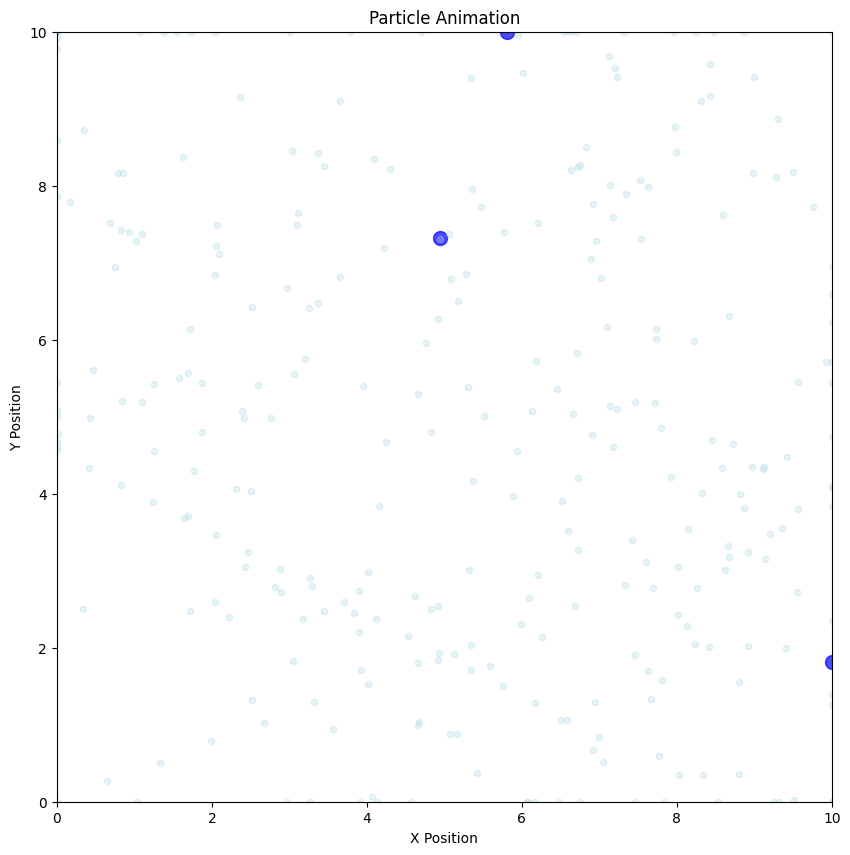

In [ ]:
# while True:
#   step=0

#     # left_hits = pos[:, 0] < 0
#     # right_hits = pos[:, 0] > L
#     # bottom_hits = pos[:, 1] < 0
#     # top_hits = pos[:, 1] > L
#     # vel[left_hits, 0] *= -1  # flip x velocity for particles hitting left wall
#     # pos[left_hits, 0] = 0.0
#     # print(pos)
#     # print(vel)
#   if step%999999999==0:
#     pos,vel=step_once(pos, vel, mass, dt, L)
#     print(pos[0][0])

# step+=1

%matplotlib inline
import matplotlib.animation as animation
from IPython.display import HTML


pos = np.array([[1,4],[1,3],[1,2]])
vel = np.random.uniform(-0.3,0.3,size=(N,2))
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Particle Animation')


scatter = ax.scatter([], [], s=100, c='blue', alpha=0.7)

def animate(frame):
    global pos, vel

    pos, vel = step_once(pos, vel, mass, dt, L)


    scatter.set_offsets(pos)

    if frame > 0:
        ax.scatter(pos[:, 0], pos[:, 1], s=20, c='lightblue', alpha=0.3)

    return scatter,


anim = animation.FuncAnimation(fig, animate, frames=100, interval=50, blit=False, repeat=True)


HTML(anim.to_jshtml())


In [ ]:
# while True:
step=0
pos,vel=step_once(pos, vel, mass, dt, L)
pos

4.744529724121094e-05


array([[0.5074598 , 0.28577251],
       [0.22958559, 4.60842676]])

In [ ]:
def kinetic_energy ( vel , mass ):

    return 1/2*1*(np.sum(vel[:,0]**2) + np.sum(vel[:, 1]**2))

print(kinetic_energy(vel, mass))

In [ ]:
d = pos [ None ,: ,:] - pos [: , None ,:] # pairwise displacements (N,N ,2)
r = np . linalg . norm (d , axis =2) # pairwise distances (N,N)
mask = ( r < rc ) & ( r > 1e-12) # ignore self and far pairs
u = d / ( r [: ,: , None ] + 1e-12) # unit vectors
fmag = -k * ( r - r0 ) * mask
F = np .sum ( fmag [: ,: , None ] * u , axis =1)

In [ ]:
pos = np.array([[11,1],[1,1],[1,11],[-11,-11],[5,5]])
vel = np.array([[1,1],[1,1],[1,1],[1,1],[1,1]])
walls_reflect_other(pos, vel, L)

6.961822509765625e-05


(array([[10,  1],
        [ 1,  1],
        [ 1, 10],
        [ 0,  0],
        [ 5,  5]]),
 array([[-1,  1],
        [ 1,  1],
        [ 1, -1],
        [-1, -1],
        [ 1,  1]]))